In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

### Simulating the effect of a confounder

Idea:

* $x$ and $y$ depend on a third variable $z$
* When we plot $y$ as a function of $x$ _without controlling for z_ we get spurious correlation

Text(0.5, 1.0, 'Example: Very Strong Correlation')

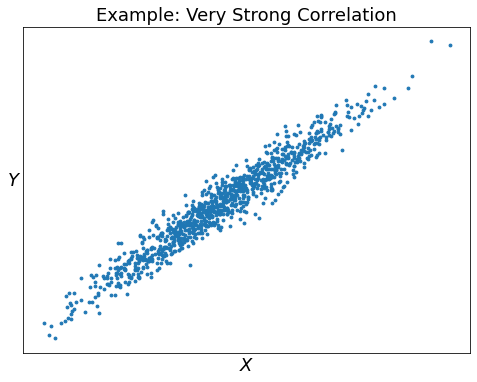

In [2]:
# fix a seed for our random number generator and number of observations to simulate
np.random.seed(422019)
nobs = 1000
# our third variable will be standard normal
z = np.random.randn(nobs,1)
# let's say that z --> x and z--> y
# Notice that x and Y are not related!
x = 0.5 + 0.4*z + 0.1*np.random.randn(nobs,1)
y  = 1.5 + 0.2*z + 0.01*np.random.randn(nobs,1)

# ready to plot
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x,y, s=8)
plt.yticks([])
plt.xticks([])
plt.ylabel('$Y$   ', rotation=0, fontsize=18)
plt.xlabel('$X$', rotation=0, fontsize=18)
plt.title('Example: Very Strong Correlation', fontsize=18)

## Using the Frisch-Waugh-Lovell theorem in the Appendix we can get a _controlled_ view

* Run regressions for $x$/$y$ on $z$ and save residuals
* Plot residuals: these are net of the Z-effect

Coefficient of Z on X equation = 0.399
Coefficient of Z on Y equation = 0.2


Text(0.5, 1.0, 'Absence of Correlation: Controlled Version')

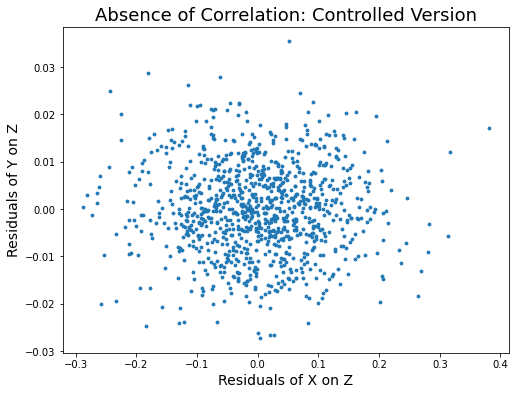

In [3]:
# Regress Y and X on Z and plot the corresponding residuls
reg_x = LinearRegression(fit_intercept=True).fit(z, x)
reg_y = LinearRegression(fit_intercept=True).fit(z, y)
# just as a check, print the coefficients (compare with the real ones above)
print('Coefficient of Z on X equation = {0}'.format(np.around(reg_x.coef_.flatten()[0],decimals=3)))
print('Coefficient of Z on Y equation = {0}'.format(np.around(reg_y.coef_.flatten()[0],decimals=3)))
# Compute residuals
resids_x = x-reg_x.predict(z)
resids_y = y-reg_y.predict(z)
# plot: correlation is no longer there
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(resids_x, resids_y, s=8)
ax.set_xlabel('Residuals of X on Z', fontsize=14)
ax.set_ylabel('Residuals of Y on Z', fontsize=14)
ax.set_title('Absence of Correlation: Controlled Version',fontsize=18)